# Linear Discriminant Analysis: Group Review
# Outliers: NONE, Quality: RECODED

## Set Working Directory

setwd("/Users/erinweaver/Documents/GitHub/TheThreeMusketeers/")

## Import Packages

In [144]:
library("tidyr")
library("corrplot")
library("MASS")
library("ggplot2")
library("tibble")
library("reshape2")

## Load in Data

In [145]:
wine <- read.csv("/Users/erinweaver/Documents/GitHub/TheThreeMusketeers/Data/WineQT.csv")
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


### View Structure of the Dataset

In [146]:
str(wine)

'data.frame':	1143 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 9.2 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ Id                  : int  0 1 2 3 4 5 6 7 8 10 ...


## Data Wrangling

### Recode 'Quality' into Three Groups

In [147]:
wine$qualityR <- NA
wine$qualityR [wine$quality==3] <- 0
wine$qualityR [wine$quality==4] <- 0
wine$qualityR [wine$quality==5] <- 1
wine$qualityR [wine$quality==6] <- 1
wine$qualityR [wine$quality==7] <- 2
wine$qualityR [wine$quality==8] <- 2

### Remove Unnecessary Columns

In [148]:
wine_wrangled <- wine[, c(2,5,8,9,14)]
head(wine_wrangled)

,volatile.acidity,chlorides,density,pH,qualityR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.70,0.076,0.9978,3.51,1
2,0.88,0.098,0.9968,3.20,1
3,0.76,0.092,0.9970,3.26,1
4,0.28,0.075,0.9980,3.16,1
5,0.70,0.076,0.9978,3.51,1
6,0.66,0.075,0.9978,3.51,1


## Identify Outliers

### Density

In [149]:
boxplot.stats(wine_wrangled$density)

$stats
[1] 0.992200 0.995570 0.996680 0.997845 1.001000

$n
[1] 1143

$conf
[1] 0.9965737 0.9967863

$out
 [1] 0.99160 0.99160 1.00140 1.00150 1.00150 1.00180 0.99120 1.00220 1.00220
[10] 1.00140 1.00140 1.00320 1.00260 1.00140 1.00315 1.00315 1.00210 1.00210
[19] 0.99170 1.00260 0.99210 0.99154 0.99064 0.99064 1.00289 0.99162 0.99007
[28] 0.99020 0.99157 0.99084 0.99191 1.00369 1.00242 0.99182 1.00242 0.99182

#### Outliers: 36

### Chlorides

In [150]:
boxplot.stats(wine_wrangled$chlorides)

$stats
[1] 0.041 0.070 0.079 0.090 0.119

$n
[1] 1143

$conf
[1] 0.07806532 0.07993468

$out
 [1] 0.341 0.332 0.467 0.178 0.610 0.270 0.039 0.337 0.263 0.611 0.358 0.213
[13] 0.214 0.121 0.128 0.120 0.122 0.122 0.121 0.127 0.152 0.125 0.122 0.200
[25] 0.226 0.250 0.124 0.222 0.039 0.157 0.422 0.034 0.387 0.415 0.157 0.241
[37] 0.190 0.132 0.126 0.038 0.165 0.147 0.012 0.012 0.194 0.132 0.161 0.120
[49] 0.120 0.123 0.123 0.414 0.171 0.178 0.166 0.136 0.132 0.132 0.123 0.123
[61] 0.403 0.137 0.414 0.166 0.168 0.415 0.153 0.415 0.123 0.214 0.169 0.205
[73] 0.205 0.039 0.235 0.230 0.038

#### Outliers: 77

### Volatile Acidity

In [151]:
boxplot.stats(wine_wrangled$volatile.acidity)

$stats
[1] 0.1200 0.3925 0.5200 0.6400 1.0050

$n
[1] 1143

$conf
[1] 0.5084333 0.5315667

$out
 [1] 1.020 1.070 1.330 1.330 1.040 1.090 1.040 1.020 1.035 1.025 1.020 1.580
[13] 1.180 1.040

#### Outliers: 14

### pH

In [152]:
boxplot.stats(wine_wrangled$pH)

$stats
[1] 2.920 3.205 3.310 3.400 3.690

$n
[1] 1143

$conf
[1] 3.300887 3.319113

$out
 [1] 3.90 3.75 2.74 2.88 2.86 3.74 3.72 2.89 2.89 3.90 3.71 2.89 3.78 3.70 3.78
[16] 4.01 2.90 4.01 2.88 3.72

#### Outliers: 20

## Graphing the Relationship of the Variables with Quality

In [190]:
aggregate(x = wine_wrangled$volatile.acidity, by = list(wine_wrangled$quality), FUN = mean) 

Group.1,x
<dbl>,<dbl>
0,1.10806933
1,0.08167755
2,-0.75723264


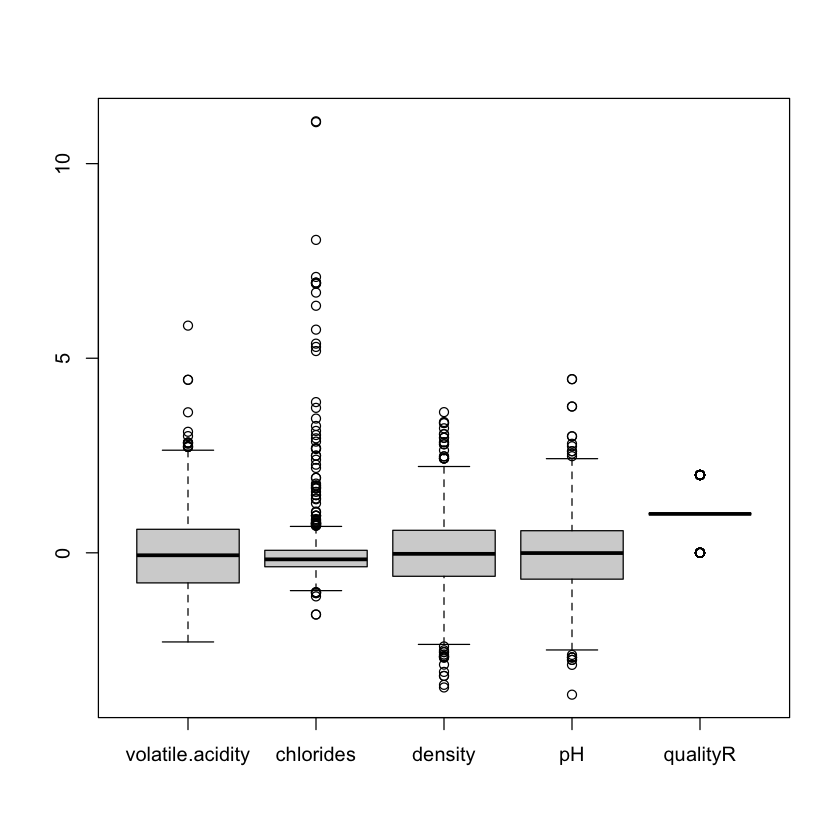

In [191]:
boxplot(wine_wrangled)

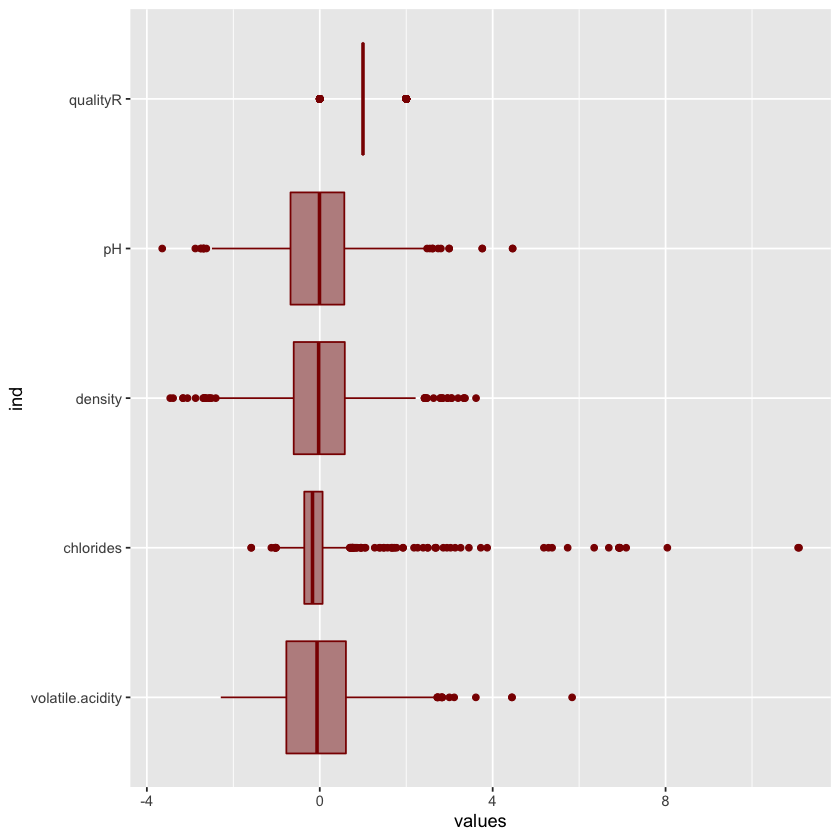

In [192]:
ggplot(stack(wine_wrangled), aes(x = ind, y = values))+
  geom_boxplot(fill='rosybrown', color="darkred") +
  coord_flip()

## Remove Outliers

In [153]:
chloride.Q1 <- quantile(wine_wrangled$chlorides, .25)
chloride.Q3 <- quantile(wine_wrangled$chlorides, .75)
chloride.IQR <- IQR(wine_wrangled$chlorides)

In [154]:
no_outliers_c <- subset(wine_wrangled, wine_wrangled$chlorides > (chloride.Q1 - 1.5*chloride.IQR) & wine_wrangled$chlorides < (chloride.Q3 + 1.5*chloride.IQR))

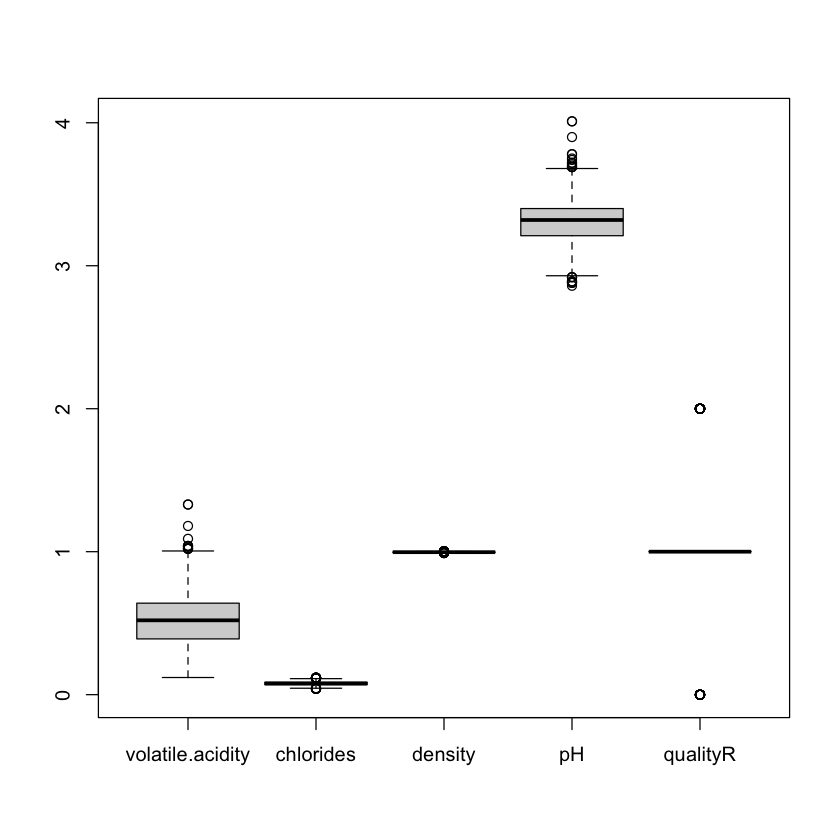

In [155]:
boxplot(no_outliers_c)

### Recheck Outlier Count

In [156]:
boxplot.stats(no_outliers_c$pH)

$stats
[1] 2.93 3.21 3.32 3.40 3.68

$n
[1] 1066

$conf
[1] 3.310805 3.329195

$out
 [1] 3.90 3.75 3.69 3.69 2.88 2.86 3.74 2.92 2.92 3.72 2.89 2.89 2.92 3.71 3.69
[16] 2.89 3.78 3.70 3.78 4.01 4.01 2.88 3.72

In [157]:
boxplot.stats(no_outliers_c$volatile.acidity)

$stats
[1] 0.120 0.390 0.520 0.640 1.005

$n
[1] 1066

$conf
[1] 0.5079019 0.5320981

$out
 [1] 1.020 1.330 1.330 1.040 1.090 1.040 1.020 1.035 1.025 1.020 1.180 1.040

In [158]:
boxplot.stats(no_outliers_c$density)

$stats
[1] 0.992200 0.995530 0.996625 0.997800 1.001000

$n
[1] 1066

$conf
[1] 0.9965151 0.9967349

$out
 [1] 0.99160 0.99160 1.00140 1.00150 1.00150 0.99120 1.00220 1.00220 1.00140
[10] 1.00140 1.00320 1.00260 1.00140 1.00315 1.00315 1.00210 1.00210 0.99170
[19] 1.00260 0.99154 1.00289 0.99162 0.99007 0.99020 0.99157 0.99084 0.99191
[28] 0.99182 0.99182

### Density

In [159]:
density_Q1 <- quantile(no_outliers_c$density, .25)
density_Q3 <- quantile(no_outliers_c$density, .75)
density_IQR <- IQR(no_outliers_c$density)

In [160]:
no_outliers_cd <- subset(no_outliers_c, no_outliers_c$density > (density_Q1 - 1.5*density_IQR) & no_outliers_c$density < (density_Q3 + 1.5*density_IQR))

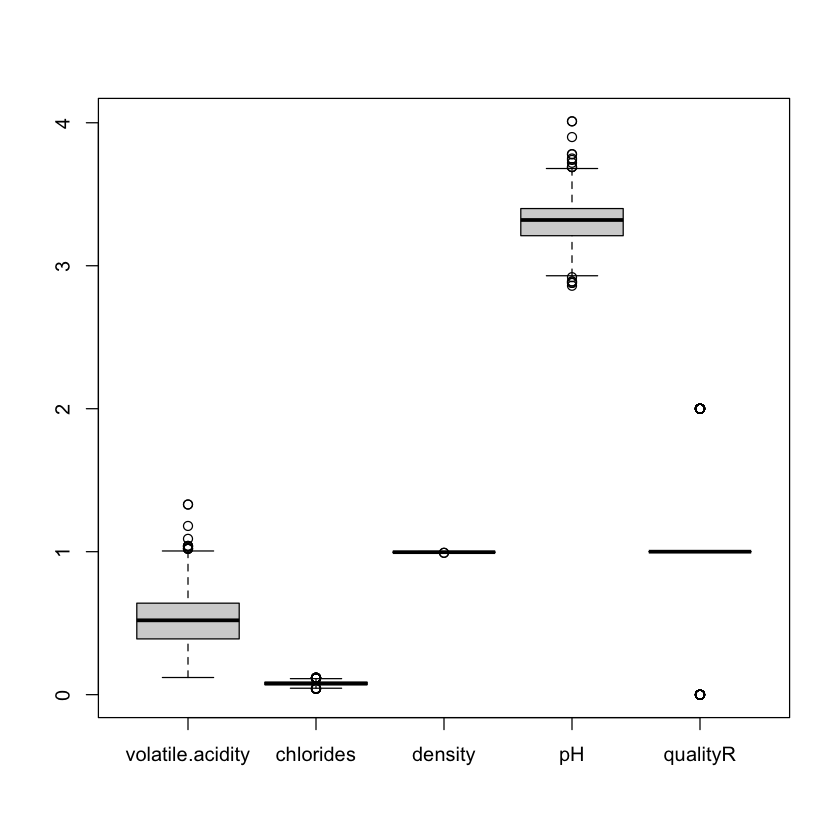

In [161]:
boxplot(no_outliers_cd)

#### Recount Outliers

In [162]:
boxplot.stats(no_outliers_cd$volatile.acidity)

$stats
[1] 0.120 0.390 0.520 0.640 1.005

$n
[1] 1037

$conf
[1] 0.5077339 0.5322661

$out
 [1] 1.020 1.330 1.330 1.040 1.090 1.040 1.020 1.035 1.025 1.020 1.180 1.040

In [163]:
boxplot.stats(no_outliers_cd$pH)

$stats
[1] 2.93 3.21 3.32 3.40 3.68

$n
[1] 1037

$conf
[1] 3.310678 3.329322

$out
 [1] 3.90 3.75 3.69 3.69 2.88 2.86 3.74 2.89 2.89 2.92 3.69 3.78 3.78 4.01 4.01
[16] 2.88 3.72

### pH

In [111]:
ph_Q1 <- quantile(no_outliers_cd$pH, .25)
ph_Q3 <- quantile(no_outliers_cd$pH, .75)
ph_IQR <- IQR(no_outliers_cd$pH)

In [164]:
no_outliers_cdp <- subset(no_outliers_cd, no_outliers_cd$pH > (ph_Q1 - 1.5*ph_IQR) & no_outliers_cd$pH < (ph_Q3 + 1.5*ph_IQR))

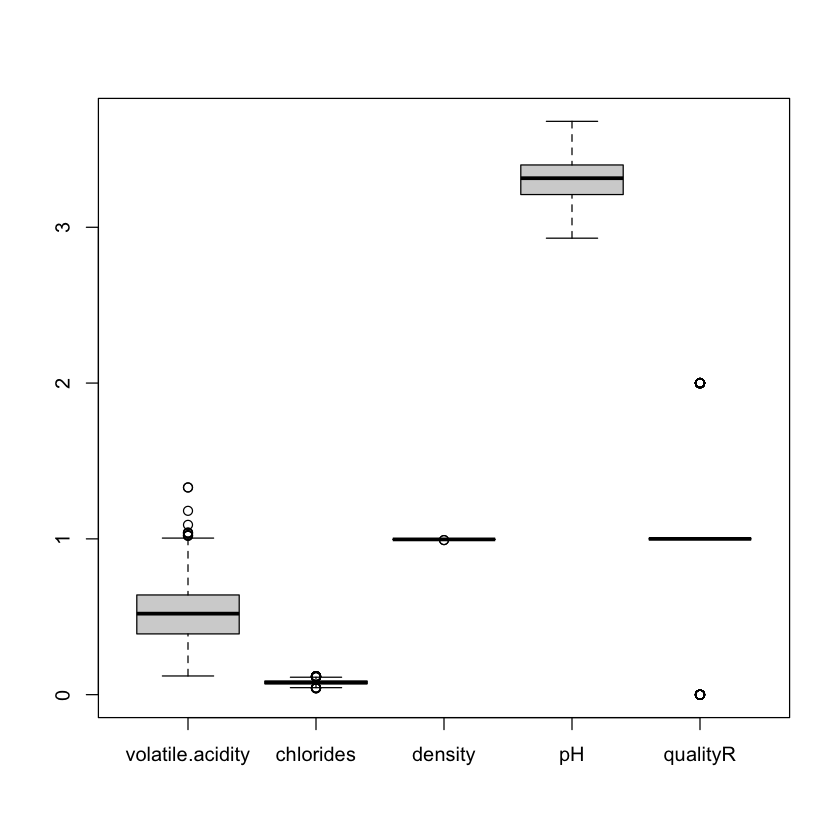

In [165]:
boxplot(no_outliers_cdp)

#### Recount Outliers

In [166]:
boxplot.stats(no_outliers_cdp$volatile.acidity)

$stats
[1] 0.120 0.390 0.520 0.640 1.005

$n
[1] 1020

$conf
[1] 0.5076321 0.5323679

$out
 [1] 1.330 1.330 1.040 1.090 1.020 1.035 1.025 1.020 1.180 1.040

### Volatile Acidity

In [167]:
acid_Q1 <- quantile(no_outliers_cdp$volatile.acidity, .25)
acid_Q3 <- quantile(no_outliers_cdp$volatile.acidity, .75)
acid_IQR <- IQR(no_outliers_cdp$volatile.acidity)

In [168]:
no_outliers <- subset(no_outliers_cdp, no_outliers_cdp$volatile.acidity > (acid_Q1 - 1.5*acid_IQR) & no_outliers_cdp$volatile.acidity < (acid_Q3 + 1.5*acid_IQR))

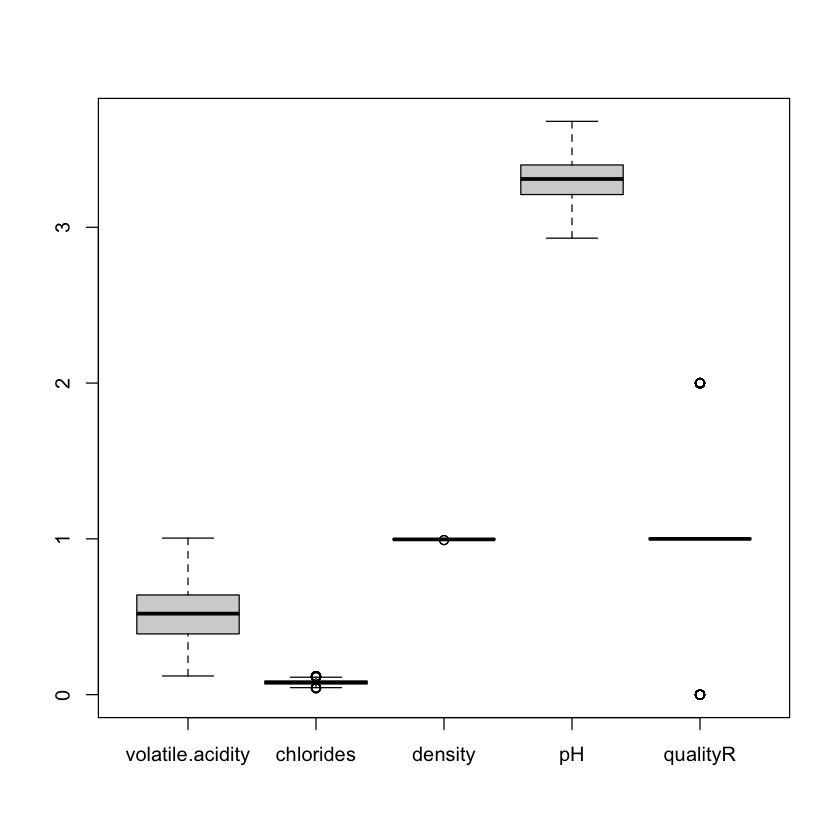

In [169]:
boxplot(no_outliers)

### Summarizing the Dataset

In [170]:
summary(wine_wrangled)

 volatile.acidity   chlorides          density             pH       
 Min.   :0.1200   Min.   :0.01200   Min.   :0.9901   Min.   :2.740  
 1st Qu.:0.3925   1st Qu.:0.07000   1st Qu.:0.9956   1st Qu.:3.205  
 Median :0.5200   Median :0.07900   Median :0.9967   Median :3.310  
 Mean   :0.5313   Mean   :0.08693   Mean   :0.9967   Mean   :3.311  
 3rd Qu.:0.6400   3rd Qu.:0.09000   3rd Qu.:0.9978   3rd Qu.:3.400  
 Max.   :1.5800   Max.   :0.61100   Max.   :1.0037   Max.   :4.010  
    qualityR    
 Min.   :0.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.105  
 3rd Qu.:1.000  
 Max.   :2.000  

## Scale the Data: Scale Each Predictor Value

In [171]:
wine_wrangled[1:4] <- scale(wine_wrangled[1:4])

### Find the Mean of Each Predictor Value:  Mean Should == 0
### Find the Standard Deviation of Each Predictor Value:  Standard Deviation Should == 1

In [172]:
apply(wine_wrangled[1:4], 2, mean)
apply(wine_wrangled[1:4], 2, sd)

volatile.acidity        chlorides          density               pH 
   -1.652847e-16    -3.662422e-17     1.039748e-16    -8.347812e-16

volatile.acidity        chlorides          density               pH 
               1                1                1                1

## Create Training and Test Samples

### Making this Example Reproducible

In [173]:
set.seed(1)

### Using 70% of Dataset as Training Set, Remaining 30% as Testing Set

In [174]:
sample <- sample(c(TRUE, FALSE), nrow(wine_wrangled), replace=TRUE, prob=c(0.7,0.3))
train <- wine_wrangled[sample, ]
test <- wine_wrangled[!sample, ]

## Fit LDA Model

In [175]:
model <- lda(qualityR~., data=train)

### View Model Output

In [176]:
model

Call:
lda(qualityR ~ ., data = train)

Prior probabilities of groups:
      0       1       2 
0.03875 0.81375 0.14750 

Group means:
  volatile.acidity   chlorides      density          pH
0       1.00446698 -0.10367361  0.005651296  0.53093655
1       0.09140134  0.02043661  0.058451338  0.01519113
2      -0.72265686 -0.21999832 -0.273547676 -0.19634775

Coefficients of linear discriminants:
                       LD1        LD2
volatile.acidity 0.9106706  0.2070886
chlorides        0.1985976 -0.7306090
density          0.3157373 -0.5016395
pH               0.2912990  0.1980449

Proportion of trace:
   LD1    LD2 
0.9531 0.0469 

Prior probabilities of group: The proportions of each 'quality' rating in the training set.

Group means: The mean values for each predictor variable for each 'quality' rating.

Coefficients of linear discriminants: Linear combination of predictor variables used to form the decision rule of the LDA model.

### View Model Info

In [177]:
model$counts
model$prior
model$scaling
model$svd

0   1   2 
 31 651 118

0       1       2 
0.03875 0.81375 0.14750

,LD1,LD2
volatile.acidity,0.9106706,0.2070886
chlorides,0.1985976,-0.7306090
density,0.3157373,-0.5016395
pH,0.2912990,0.1980449


[1] 7.950447 1.764021

### Store Model Means

In [178]:
modelmeans <- model$means

### Convert Matrix to a Data Frame

In [179]:
modelmeans <- as.data.frame(modelmeans)
str(modelmeans)

'data.frame':	3 obs. of  4 variables:
 $ volatile.acidity: num  1.0045 0.0914 -0.7227
 $ chlorides       : num  -0.1037 0.0204 -0.22
 $ density         : num  0.00565 0.05845 -0.27355
 $ pH              : num  0.5309 0.0152 -0.1963


### Convert Row Labels to Columns

In [129]:
modelmeans <- tibble::rownames_to_column(modelmeans, "qualityR")

## Plot Means

### Melt Data Frame

In [180]:
mmodelmeans <- melt(modelmeans, id.vars="qualityR")

ERROR: Error: id variables not found in data: qualityR


### All Variables on the Same Plot

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.99”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”
Warning message in predLoess(object$y, object$

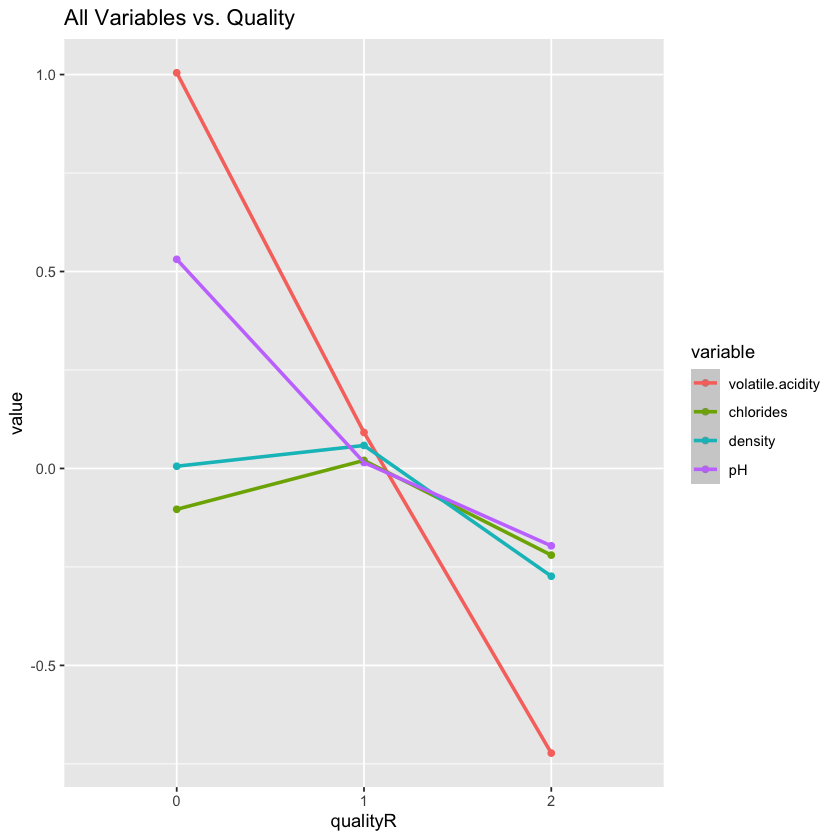

In [131]:
ggplot(mmodelmeans, aes(qualityR, value, group=variable, col=variable)) + ggtitle("All Variables vs. Quality")+ geom_line() + geom_point() + stat_smooth()

### Variables on Separate Plots

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.99”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”
Warning message in predLoess(object$y, object$

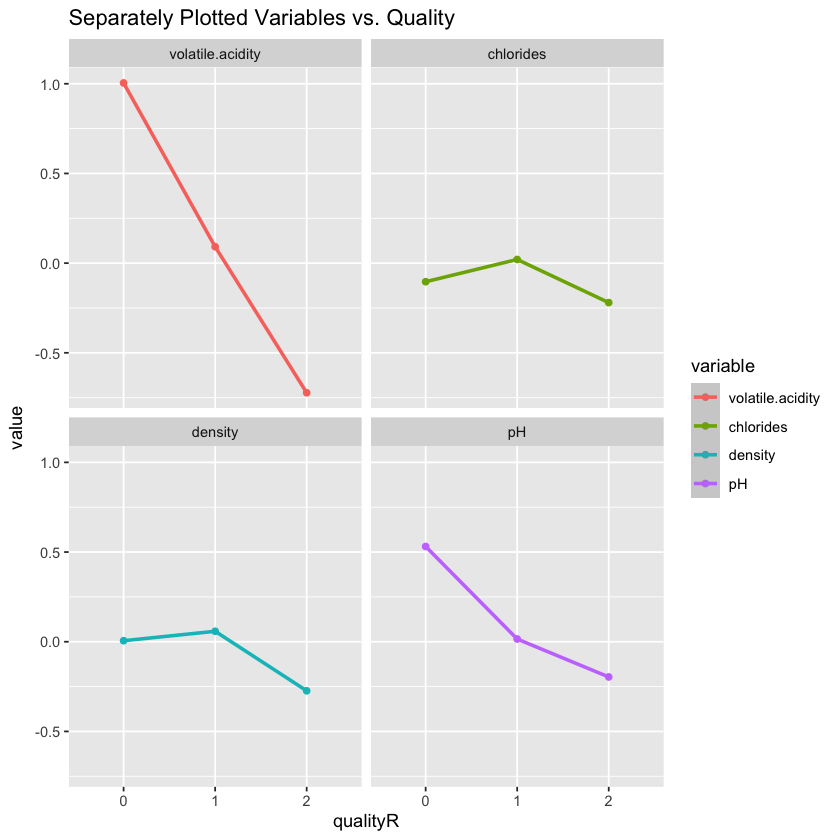

In [181]:
ggplot(mmodelmeans, aes(qualityR, value, group=variable, col=variable)) + ggtitle ("Separately Plotted Variables vs. Quality")+
  geom_point() + 
  stat_smooth() +
  facet_wrap(~variable)

## LDA model: Make Predictions on Test Data

In [182]:
predicted <- predict(model, test)
names(predicted)

[1] "class"     "posterior" "x"

### View Predicted Class (First Six Observations)

In [183]:
head(predicted$class)

[1] 1 1 1 1 1 1
Levels: 0 1 2

### View Predicted Posterior Probability (First Six Observations)¶

In [135]:
head(predicted$posterior)

,0,1,2
4,0.003678563,0.6901224,0.30619903
6,0.075592617,0.8853544,0.03905293
7,0.032025977,0.8712111,0.09676291
15,0.018379246,0.8634723,0.11814842
17,0.012521832,0.8269567,0.16052150
18,0.014032561,0.8260119,0.15995554


### View Linear Discriminants (First Six Observations)¶

In [184]:
head(predicted$x)

,LD1,LD2
4,-1.4025657,-0.639987482
6,1.1418694,0.292656910
7,0.1923929,0.415575286
15,-0.1133155,-0.218400689
17,-0.4783555,-0.211662561
18,-0.4469785,-0.002199495


## Accuracy of the Model

In [185]:
mean(predicted$class==test$quality)

[1] 0.8688047

## Visualize the Results

### Rebuild Model with 'Quality' as a Factor

### Define Data to Plot

In [186]:
set.seed(1)

In [187]:
sample <- sample(c(TRUE, FALSE), nrow(wine_wrangled), replace=TRUE, prob=c(0.7,0.3))
train <- wine_wrangled[sample, ]
test <- wine_wrangled[!sample, ]

In [188]:
LDAmodel <- lda(qualityR~., data=train)

In [138]:
lda_plot <- cbind(train, predict(model)$x)

### Create Plot

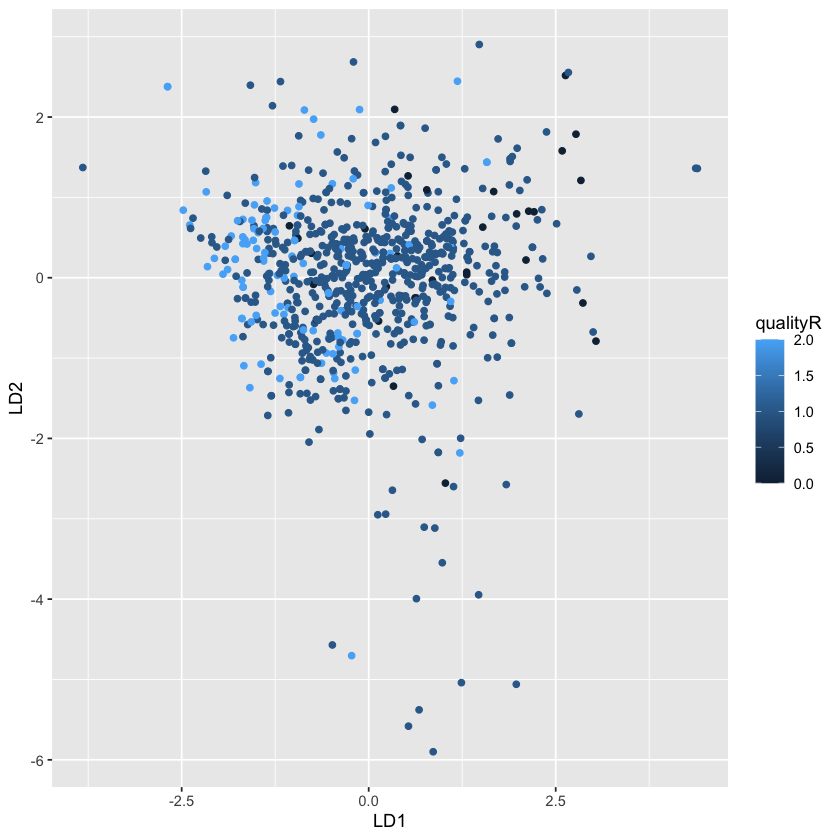

In [189]:
ggplot(lda_plot, aes(LD1, LD2)) +
  geom_point(aes(color = qualityR))